In [1]:
!git clone https://github.com/JunkyByte/easy_ViTPose.git
%cd easy_ViTPose
!pip install -r requirements.txt
!pip install -e .
!pip install huggingface_hub
!pip install onnx onnxruntime-gpu

Cloning into 'easy_ViTPose'...
remote: Enumerating objects: 692, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 692 (delta 100), reused 77 (delta 77), pack-reused 584
Receiving objects: 100% (692/692), 7.07 MiB | 1.26 MiB/s, done.
Resolving deltas: 100% (407/407), done.
/content/easy_ViTPose
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 48

Obtaining file:///content/easy_ViTPose
  Preparing metadata (setup.py) ... done
  Running setup.py develop for easy-ViTPose
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 98.3 MB/s eta 0:00:00


In [1]:
import cv2
import os
from google.colab import files
from glob import glob

from huggingface_hub import hf_hub_download

import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# vedio2image(embedded)

In [2]:
def extract_images_from_video(file_path, frane_btn):

  '''
  file_path : mp4 저장위치
  frame_btn : 이미지 저장 간격

  추출한 이미지는 file_path의 파일 생성 후 파일에 저장
  '''

  video = cv2.VideoCapture(file_path)
  if not video.isOpened():
    print("비디오 파일을 열 수 없습니다.")
    return
  fps = int(video.get(cv2.CAP_PROP_FPS))
  frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

  output_folder = file_path[:-4]
  os.makedirs(output_folder, exist_ok=True)


  count = 0
  time_elapsed = 0

  while video.isOpened():
      ret, image = video.read()

      if not ret:
          break

      time_elapsed += 1 / fps  # 경과 시간 업데이트

      if time_elapsed >= frame_btn:  # 1초 이상 경과하면 이미지 저장
          image_path = os.path.join(output_folder, f'frame_{frame_btn}_{count:03d}.jpg')
          cv2.imwrite(image_path, image)
          print(f'Saved frame {count} at {time_elapsed:.2f} seconds')
          count += 1
          time_elapsed = 0  # 경과 시간 초기화

  return output_folder

  # 비디오 해제
  video.release()
  cv2.destroyAllWindows()

In [3]:
file_path = '/content/drive/MyDrive/sum23/pose_esti/final/seven.mp4'
frame_btn = 0.2

output_folder = extract_images_from_video(file_path, frame_btn)

Saved frame 0 at 0.21 seconds
Saved frame 1 at 0.21 seconds
Saved frame 2 at 0.21 seconds
Saved frame 3 at 0.21 seconds
Saved frame 4 at 0.21 seconds
Saved frame 5 at 0.21 seconds
Saved frame 6 at 0.21 seconds
Saved frame 7 at 0.21 seconds
Saved frame 8 at 0.21 seconds
Saved frame 9 at 0.21 seconds
Saved frame 10 at 0.21 seconds
Saved frame 11 at 0.21 seconds
Saved frame 12 at 0.21 seconds
Saved frame 13 at 0.21 seconds
Saved frame 14 at 0.21 seconds
Saved frame 15 at 0.21 seconds
Saved frame 16 at 0.21 seconds
Saved frame 17 at 0.21 seconds
Saved frame 18 at 0.21 seconds
Saved frame 19 at 0.21 seconds
Saved frame 20 at 0.21 seconds
Saved frame 21 at 0.21 seconds
Saved frame 22 at 0.21 seconds
Saved frame 23 at 0.21 seconds
Saved frame 24 at 0.21 seconds
Saved frame 25 at 0.21 seconds
Saved frame 26 at 0.21 seconds
Saved frame 27 at 0.21 seconds
Saved frame 28 at 0.21 seconds
Saved frame 29 at 0.21 seconds
Saved frame 30 at 0.21 seconds
Saved frame 31 at 0.21 seconds
Saved frame 32 at 

# vedio2image(upload) ** 무시 **

In [ ]:
def extract_images_from_video2(file_path, frane_btn):

  '''
  file_path : mp4 저장위치
  frame_btn : 이미지 저장 간격

  추출한 이미지는 file_path의 파일 생성 후 파일에 저장
  '''

  uploaded_files = files.upload()
  uploaded_file_name = list(uploaded_files.keys())[0]

  video = cv2.VideoCapture(uploaded_file_name)
  if not video.isOpened():
    print("비디오 파일을 열 수 없습니다.")
    return
  fps = int(video.get(cv2.CAP_PROP_FPS))
  frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

  output_folder = file_path + uploaded_file_name.split('.')[0]
  os.makedirs(output_folder, exist_ok=True)


  count = 0
  time_elapsed = 0

  while video.isOpened():
      ret, image = video.read()

      if not ret:
          break

      time_elapsed += 1 / fps  # 경과 시간 업데이트

      if time_elapsed >= frame_btn:  # 1초 이상 경과하면 이미지 저장
          image_path = os.path.join(output_folder, f'frame_{frame_btn}_{count:03d}.jpg')
          cv2.imwrite(image_path, image)
          print(f'Saved frame {count} at {time_elapsed:.2f} seconds')
          count += 1
          time_elapsed = 0  # 경과 시간 초기화

  # 비디오 해제
  video.release()
  cv2.destroyAllWindows()

  return output_folder

In [ ]:
file_path = '/content/drive/MyDrive/sum23/pose_esti/videocut/'
frame_btn = 0.2

output_folder = extract_images_from_video2(file_path, frame_btn)

Saving hypeboy.mp4 to hypeboy (1).mp4
Saved frame 0 at 0.23 seconds
Saved frame 1 at 0.23 seconds
Saved frame 2 at 0.23 seconds
Saved frame 3 at 0.23 seconds
Saved frame 4 at 0.23 seconds
Saved frame 5 at 0.23 seconds
Saved frame 6 at 0.23 seconds
Saved frame 7 at 0.23 seconds
Saved frame 8 at 0.23 seconds
Saved frame 9 at 0.23 seconds
Saved frame 10 at 0.23 seconds
Saved frame 11 at 0.23 seconds
Saved frame 12 at 0.23 seconds
Saved frame 13 at 0.23 seconds
Saved frame 14 at 0.23 seconds
Saved frame 15 at 0.23 seconds
Saved frame 16 at 0.23 seconds
Saved frame 17 at 0.23 seconds
Saved frame 18 at 0.23 seconds
Saved frame 19 at 0.23 seconds
Saved frame 20 at 0.23 seconds
Saved frame 21 at 0.23 seconds
Saved frame 22 at 0.23 seconds
Saved frame 23 at 0.23 seconds
Saved frame 24 at 0.23 seconds
Saved frame 25 at 0.23 seconds
Saved frame 26 at 0.23 seconds
Saved frame 27 at 0.23 seconds
Saved frame 28 at 0.23 seconds
Saved frame 29 at 0.23 seconds
Saved frame 30 at 0.23 seconds
Saved frame

# ViTPose main_code edit

In [4]:
MODEL_TYPE = 'onnx'
MODEL_SIZE = 'l'
YOLO_TYPE = 'onnx'
YOLO_SIZE = 'n'
ext = {'tensorrt': '.engine', 'onnx': '.onnx', 'torch': '.pth'}[MODEL_TYPE]
ext_yolo = {'onnx': '.onnx', 'torch': '.pt'}[YOLO_TYPE]

REPO_ID = 'JunkyByte/easy_ViTPose'
FILENAME = os.path.join(MODEL_TYPE, 'vitpose-25-' + MODEL_SIZE) + ext
FILENAME_YOLO = 'yolov5/yolov5' + YOLO_SIZE + ext_yolo

print(f'Downloading model {REPO_ID}/{FILENAME}')
model_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME)
yolo_path = hf_hub_download(repo_id=REPO_ID, filename=FILENAME_YOLO)

In [5]:
%cd /content/easy_ViTPose/easy_ViTPose/
!ls

/content/easy_ViTPose/easy_ViTPose
configs        easy_ViTPose.egg-info  __pycache__    train.py
config.yaml    export.py	      sort.py	     utils_engine.py
datasets       inference.py	      to_onnx.ipynb  vit_models
downloader.py  __init__.py	      to_trt.ipynb   vit_utils


In [6]:
# If you get an error from PIL restart environment and rerun this cell to update packages version
# from easy_ViTPose.inference import VitInference
import abc
import time
from typing import Optional
import json
import os
import tqdm

from PIL import Image
import cv2
import numpy as np
import torch

from configs.ViTPose_common import data_cfg
from vit_models.model import ViTPose
from vit_utils.top_down_eval import keypoints_from_heatmaps
from vit_utils.visualization import draw_points_and_skeleton, joints_dict
from vit_utils.inference import pad_image, VideoReader, NumpyEncoder, draw_bboxes
from sort import Sort

try:  # Add bools -> error stack
    import pycuda.driver as cuda  # noqa: [F401]
    import pycuda.autoinit  # noqa: [F401]
    import utils_engine as engine_utils
    import tensorrt as trt
    has_trt = True
except ModuleNotFoundError:
    pass

try:
    import onnxruntime
    has_onnx = True
except ModuleNotFoundError:
    pass

__all__ = ['VitInference']
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]


class VitInference:
    """
    Class for performing inference using ViTPose models with YOLOv5 human detection detection and SORT tracking.

    Args:
        model (str): Path to the ViT model file (.pth, .onnx, .engine).
        yolo_name (str): Name of the YOLOv5 model to load.
        model_name (str, optional): Name of the ViT model architecture to use. Valid values are 's', 'b', 'l', 'h'.
                                    Defaults to None, is necessary when using .pth checkpoints.
        yolo_size (int, optional): Size of the input image for YOLOv5 model. Defaults to 320.
        device (str, optional): Device to use for inference. Defaults to 'cuda' if available, else 'cpu'.
        is_video (bool, optional): Flag indicating if the input is video. Defaults to False.
        single_pose (bool, optional): Flag indicating if the video (on images this flag has no effect) will contain a single pose.
                                      In this case the SORT tracker is not used (increasing performance) but people id tracking
                                      won't be consistent among frames.
        yolo_step (int, optional): The tracker can be used to predict the bboxes instead of yolo for performance,
                                   this flag specifies how often yolo is applied (e.g. 1 applies yolo every frame).
                                   This does not have any effect when is_video is False.
    """

    def __init__(self, model: str,
                 yolo_name: str,
                 model_name: Optional[str] = None,
                 yolo_size: Optional[int] = 320,
                 device: Optional[str] = None,
                 is_video: Optional[bool] = False,
                 single_pose: Optional[bool] = False,
                 yolo_step: Optional[int] = 1):
        assert os.path.isfile(model), f'The model file {model} does not exist'
        assert os.path.isfile(yolo_name), f'The YOLOv5 model {yolo_name} does not exist'

        # Device priority is cuda / mps / cpu
        if device is None:
            if torch.cuda.is_available():
                device = 'cuda'
            elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
                device = 'mps'
            else:
                device = 'cpu'

        self.device = torch.device(device)
        self.yolo = torch.hub.load("ultralytics/yolov5", "custom", yolo_name)
        self.yolo.to(self.device)
        self.yolo.classes = [0]
        self.yolo_size = yolo_size
        self.yolo_step = yolo_step
        self.is_video = is_video
        self.single_pose = single_pose
        self.reset()

        # State saving during inference
        self.save_state = True  # Can be disabled manually
        self._img = None
        self._yolo_res = None
        self._tracker_res = None
        self._keypoints = None

        # Use extension to decide which kind of model has been loaded
        use_onnx = model.endswith('.onnx')
        use_trt = model.endswith('.engine')

        assert model_name in [None, 's', 'b', 'l', 'h'], \
            f'The model name {model_name} is not valid'

        # onnx / trt models do not require model_cfg specification
        if model_name is None:
            assert use_onnx or use_trt, \
                'Specify the model_name if not using onnx / trt'
        else:
            if model_name == 's':
                from configs.ViTPose_small_coco_256x192 import model as model_cfg
            elif model_name == 'b':
                from configs.ViTPose_base_coco_256x192 import model as model_cfg
            elif model_name == 'l':
                from configs.ViTPose_large_coco_256x192 import model as model_cfg
            elif model_name == 'h':
                from configs.ViTPose_huge_coco_256x192 import model as model_cfg

        self.target_size = data_cfg['image_size']
        if use_onnx:
            self._ort_session = onnxruntime.InferenceSession(model,
                                                             providers=['CUDAExecutionProvider',
                                                                        'CPUExecutionProvider'])
            inf_fn = self._inference_onnx
        elif use_trt:
            logger = trt.Logger(trt.Logger.ERROR)
            trt_runtime = trt.Runtime(logger)
            trt_engine = engine_utils.load_engine(trt_runtime, model)

            # This allocates memory for network inputs/outputs on both CPU and GPU
            self._inputs, self._outputs, self._bindings, self._stream = \
                engine_utils.allocate_buffers(trt_engine)
            # Execution context is needed for inference
            self._context = trt_engine.create_execution_context()
            inf_fn = self._inference_trt
        else:
            self._vit_pose = ViTPose(model_cfg)
            self._vit_pose.eval()

            ckpt = torch.load(model, map_location='cpu')
            if 'state_dict' in ckpt:
                self._vit_pose.load_state_dict(ckpt['state_dict'])
            else:
                self._vit_pose.load_state_dict(ckpt)
            self._vit_pose.to(device)
            inf_fn = self._inference_torch

        # Override inference with selected engine
        self._inference = inf_fn

    def reset(self):
        """
        Reset the inference class to be ready for a new video.
        This will reset the internal counter of frames, on videos
        this is necessary to reset the tracker.
        """
        min_hits = 3 if self.yolo_step == 1 else 1
        use_tracker = self.is_video and not self.single_pose
        self.tracker = Sort(max_age=self.yolo_step,
                            min_hits=min_hits,
                            iou_threshold=0.3) if use_tracker else None  # TODO: Params
        self.frame_counter = 0

    @classmethod
    def postprocess(cls, heatmaps, org_w, org_h):
        """
        Postprocess the heatmaps to obtain keypoints and their probabilities.

        Args:
            heatmaps (ndarray): Heatmap predictions from the model.
            org_w (int): Original width of the image.
            org_h (int): Original height of the image.

        Returns:
            ndarray: Processed keypoints with probabilities.
        """
        points, prob = keypoints_from_heatmaps(heatmaps=heatmaps,
                                               center=np.array([[org_w // 2,
                                                                 org_h // 2]]),
                                               scale=np.array([[org_w, org_h]]),
                                               unbiased=True, use_udp=True)
        return np.concatenate([points[:, :, ::-1], prob], axis=2)

    @abc.abstractmethod
    def _inference(img: np.ndarray) -> np.ndarray:
        """
        Abstract method for performing inference on an image.
        It is overloaded by each inference engine.

        Args:
            img (ndarray): Input image for inference.

        Returns:
            ndarray: Inference results.
        """
        raise NotImplementedError

    def inference(self, img: np.ndarray) -> np.ndarray:
        """
        Perform inference on the input image.

        Args:
            img (ndarray): Input image for inference in RGB format.

        Returns:
            ndarray: Inference results.
        """

        # First use YOLOv5 for detection
        res_pd = np.empty((0, 5))
        results = None
        if (self.tracker is None or
           (self.frame_counter % self.yolo_step == 0 or self.frame_counter < 3)):
            results = self.yolo(img, size=self.yolo_size)
            res_pd = np.array([r[:5].tolist() for r in  # TODO: Confidence threshold
                               results.pandas().xyxy[0].to_numpy() if r[4] > 0.35]).reshape((-1, 5))
        self.frame_counter += 1

        frame_keypoints = {}
        ids = None
        if self.tracker is not None:
            res_pd = self.tracker.update(res_pd)
            ids = res_pd[:, 5].astype(int).tolist()

        # Prepare boxes for inference
        bboxes = res_pd[:, :4].round().astype(int)
        scores = res_pd[:, 4].tolist()
        pad_bbox = 10

        if ids is None:
            ids = range(len(bboxes))

        for bbox, id in zip(bboxes, ids):
            # TODO: Slightly bigger bbox
            bbox[[0, 2]] = np.clip(bbox[[0, 2]] + [-pad_bbox, pad_bbox], 0, img.shape[1])
            bbox[[1, 3]] = np.clip(bbox[[1, 3]] + [-pad_bbox, pad_bbox], 0, img.shape[0])

            # Crop image and pad to 3/4 aspect ratio
            img_inf = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]
            img_inf, (left_pad, top_pad) = pad_image(img_inf, 3 / 4)

            keypoints = self._inference(img_inf)[0]
            # Transform keypoints to original image
            keypoints[:, :2] += bbox[:2][::-1] - [top_pad, left_pad]
            frame_keypoints[id] = keypoints

        if self.save_state:
            self._img = img
            self._yolo_res = results
            self._tracker_res = (bboxes, ids, scores)
            self._keypoints = frame_keypoints

        return frame_keypoints

    def draw(self, show_yolo=True, show_raw_yolo=False, confidence_threshold=0.5):
        """
        Draw keypoints and bounding boxes on the image.

        Args:
            show_yolo (bool, optional): Whether to show YOLOv5 bounding boxes. Default is True.
            show_raw_yolo (bool, optional): Whether to show raw YOLOv5 bounding boxes. Default is False.

        Returns:
            ndarray: Image with keypoints and bounding boxes drawn.
        """
        img = self._img.copy()
        bboxes, ids, scores = self._tracker_res

        if self._yolo_res is not None and (show_raw_yolo or (self.tracker is None and show_yolo)):
            img = np.array(self._yolo_res.render())[0]

        if show_yolo and self.tracker is not None:
            img = draw_bboxes(img, bboxes, ids, scores)

        img = np.array(img)[..., ::-1]  # RGB to BGR for cv2 modules
        for idx, k in self._keypoints.items():
            img = draw_points_and_skeleton(img.copy(), k,
                                           joints_dict()['coco']['skeleton'],
                                           person_index=idx,
                                           points_color_palette='gist_rainbow',
                                           skeleton_color_palette='jet',
                                           points_palette_samples=10,
                                           confidence_threshold=confidence_threshold)
        return img[..., ::-1], self._keypoints  # Return RGB as original

    def pre_img(self, img):
        org_h, org_w = img.shape[:2]
        img_input = cv2.resize(img, self.target_size, interpolation=cv2.INTER_LINEAR) / 255
        img_input = ((img_input - MEAN) / STD).transpose(2, 0, 1)[None].astype(np.float32)
        return img_input, org_h, org_w

    @torch.no_grad()
    def _inference_torch(self, img: np.ndarray) -> np.ndarray:
        # Prepare input data
        img_input, org_h, org_w = self.pre_img(img)
        img_input = torch.from_numpy(img_input).to(self.device)

        # Feed to model
        heatmaps = self._vit_pose(img_input).detach().cpu().numpy()
        return self.postprocess(heatmaps, org_w, org_h)

    def _inference_onnx(self, img: np.ndarray) -> np.ndarray:
        # Prepare input data
        img_input, org_h, org_w = self.pre_img(img)

        # Feed to model
        ort_inputs = {self._ort_session.get_inputs()[0].name: img_input}
        heatmaps = self._ort_session.run(None, ort_inputs)[0]
        return self.postprocess(heatmaps, org_w, org_h)

    def _inference_trt(self, img: np.ndarray) -> np.ndarray:
        # Prepare input data
        img_input, org_h, org_w = self.pre_img(img)

        # Copy the data to appropriate memory
        np.copyto(self._inputs[0].host, img_input.ravel())
        heatmaps = engine_utils.do_inference(context=self._context,
                                             bindings=self._bindings,
                                             inputs=self._inputs,
                                             outputs=self._outputs,
                                             stream=self._stream)[0]

        # Reshape to output size
        heatmaps = heatmaps.reshape(1, 25, img_input.shape[2] // 4, img_input.shape[3] // 4)
        return self.postprocess(heatmaps, org_w, org_h)

model_pose = VitInference(model_path, yolo_path, MODEL_SIZE, yolo_size=320, is_video=False)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-8-28 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Loading /root/.cache/huggingface/hub/models--JunkyByte--easy_ViTPose/snapshots/2e599f9067ef175c7e270bafca586d1cf8d3f9df/yolov5/yolov5n.onnx for ONNX Runtime inference...
Adding AutoShape... 


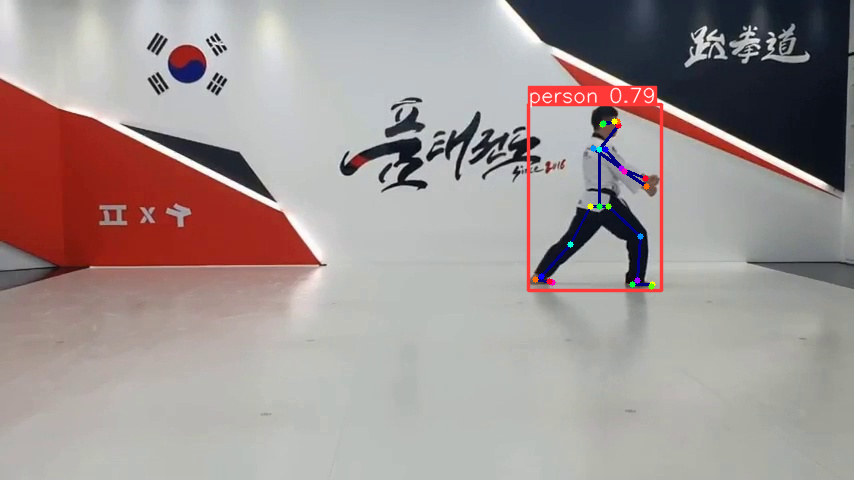

In [7]:
i = 120 # 순서
frame_num = f'/{os.listdir(output_folder)[i]}'

file_path = output_folder + frame_num
img = np.array(Image.open(file_path))

# img = np.array(Image.open(list(files.upload().keys())[0]), dtype=np.uint8)

frame_keypoints = model_pose.inference(img)
img, key_points = model_pose.draw(show_yolo=True)

cv2_imshow(img[..., ::-1])

In [8]:
key_points

{0: array([[      125.8,      618.22,     0.94992],
        [     121.79,      617.43,     0.91524],
        [     121.78,      614.99,     0.93912],
        [     124.29,      602.05,     0.64736],
        [     123.91,      603.18,     0.91067],
        [     149.06,      599.16,     0.94007],
        [     148.33,      593.17,     0.85946],
        [     149.94,       605.7,     0.92843],
        [     168.01,         622,     0.93462],
        [      171.7,      624.27,     0.93093],
        [     178.83,      645.74,     0.97502],
        [     186.39,      646.04,     0.96338],
        [      206.7,      590.93,     0.82192],
        [     206.61,      608.61,     0.83457],
        [     206.53,      599.68,     0.84448],
        [     244.21,      570.77,     0.94348],
        [     236.92,      640.15,     0.95502],
        [     276.18,      541.04,     0.94124],
        [     280.45,      637.41,     0.94385],
        [     282.49,      552.78,     0.83691],
        [        

# pre-processing

In [9]:
# 전체 이미지에 대한 관절 표시

key_points_lst = {}

for num, img in enumerate(os.listdir(output_folder)):
  frame_num = f'/{img}'

  file_path = output_folder + frame_num
  img = np.array(Image.open(file_path))

  frame_keypoints = model_pose.inference(img)
  img, key_points = model_pose.draw(show_yolo=True)

  key_points_lst[num] = key_points

In [10]:
key_points_lst[0]

{0: array([[     81.389,         413,     0.94192],
        [     74.858,      418.12,      0.9659],
        [     75.126,      414.64,     0.92421],
        [     78.594,      435.96,     0.95185],
        [     79.026,      432.34,     0.68968],
        [     118.39,      441.72,      0.9172],
        [     116.28,      452.85,     0.93654],
        [     120.93,      430.39,     0.87693],
        [     154.74,      481.78,     0.94761],
        [     156.77,      405.14,     0.88903],
        [        182,       453.2,       0.955],
        [     159.08,      373.39,     0.95618],
        [     208.08,      427.95,      0.8232],
        [     209.37,      440.94,     0.75365],
        [     208.42,      433.98,     0.77775],
        [     250.35,      375.38,     0.95266],
        [      266.9,      426.86,     0.92517],
        [      317.1,      375.38,     0.96617],
        [     328.78,      455.69,     0.90727],
        [     343.23,      358.68,       0.868],
        [     342

In [11]:
key_points_test = []

# 태극 7장에서 추출한 img의 관절정보 저장

for img in os.listdir(output_folder):
  frame_num = f'/{img}'

  file_path = output_folder + frame_num
  img = np.array(Image.open(file_path))

  frame_keypoints = model_pose.inference(img)
  img, key_points = model_pose.draw(show_yolo=True)

  key_points_test.append(key_points)

# Classification (Best Model)

In [12]:
import cv2
import os
from google.colab import files
import pandas as pd
import numpy as np

import numpy as np
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [13]:
path = '/content/drive/MyDrive/sum23/pose_esti/data/원천데이터'
keypoints = np.load("/content/drive/MyDrive/sum23/pose_esti/data/keypoints.npy", allow_pickle=True)
labels = np.load("/content/drive/MyDrive/sum23/pose_esti/data/labels.npy", allow_pickle=True)

In [14]:
def keypoint_flatten(keypoints, label):
  columns = []

  for i in range(25):
    columns.extend([f'y{i}', f'x{i}'])
  columns.append('label')
  ml_data = pd.DataFrame(columns = columns)


  for idx, keypoint in enumerate(keypoints):
    flattend_data = []

    try :
      for i in keypoint[0]:
        flattend_data.append(i[0])
        flattend_data.append(i[1])
      flattend_data.append(label[idx])
      ml_data.loc[idx] = flattend_data
    except :
      pass
  return ml_data

In [15]:
df = keypoint_flatten(keypoints, labels)

In [16]:
df.head()

,y0,x0,y1,x1,y2,...,y23,x23,y24,x24,label
0,205.177368,966.683228,194.080811,979.200867,193.277130,...,619.279541,932.659607,601.986206,948.716980,0.0
1,211.253021,567.365601,205.044968,570.523926,204.725693,...,506.744324,644.375732,505.097046,678.189026,0.0
2,149.869995,943.557556,140.361084,953.411743,140.619995,...,520.015259,914.174866,504.355469,924.018311,0.0
3,179.628754,718.676331,173.180954,724.367920,172.443756,...,491.723633,779.317139,493.803284,818.889893,0.0
4,100.417236,921.562256,92.367981,929.884583,92.681030,...,427.179443,890.333801,413.665283,904.144775,0.0


In [17]:
# 새로운 DataFrame 생성하여 추가할 데이터 저장
augmented_data = []

# Augmentation
for idx, row in df.iterrows():
    augmented_row = {}
    for col_name, value in row.items():
        if col_name.startswith('x'):
            new_value = 1920 - value  # 1920에서 뺀 값으로 대체
            augmented_row[col_name] = new_value
        else:
            augmented_row[col_name] = value
    augmented_data.append(augmented_row)

# 새로운 데이터를 포함한 DataFrame 생성
augmented_df = pd.DataFrame(augmented_data)

# 원래 데이터와 확장된 데이터 결합
final_df = pd.concat([df, augmented_df], ignore_index=True)

In [18]:
standardized_df = final_df.copy()

def standardization(value, mean, std):
  return (value - mean) / std

for idx, row in standardized_df.iterrows():
    x_coord = []
    y_coord = []
    for col_name, value in row.items():
        if col_name.startswith('x'):
          x_coord.append(value)
        elif col_name.startswith('y'):
          y_coord.append(value)

    x_mean = np.array(x_coord).mean()
    x_std = np.array(x_coord).std()
    y_mean = np.array(y_coord).mean()
    y_std = np.array(y_coord).std()

    for col_name, value in row.items():
        if col_name.startswith('x'):
          standardized_df.loc[idx, col_name] = standardization(value, x_mean, x_std)
        elif col_name.startswith('y'):
          standardized_df.loc[idx, col_name] = standardization(value, y_mean, y_std)

standardized_df[:5]

,y0,x0,y1,x1,y2,...,y23,x23,y24,x24,label
0,-1.211710,-0.084188,-1.273957,0.292913,-1.278465,...,1.111227,-1.109168,1.014218,-0.625431,0.0
1,-1.229617,-0.876085,-1.280594,-0.789579,-1.283216,...,1.196825,1.233221,1.183299,2.159367,0.0
2,-1.223080,-0.091482,-1.283774,0.267598,-1.282121,...,1.139483,-1.162166,1.039530,-0.803478,0.0
3,-1.244221,-0.738662,-1.294174,-0.586785,-1.299885,...,1.173670,0.879507,1.189782,1.935486,0.0
4,-1.229815,-0.046309,-1.288162,0.285960,-1.285892,...,1.138770,-1.293106,1.040810,-0.741703,0.0


In [19]:
x = standardized_df.drop(columns = 'label')
y = standardized_df['label']

In [20]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier()

In [21]:
model.fit(train_x, train_y)
model.score(valid_x, valid_y)

0.9559902200488998

# Validation

In [22]:
# 7장 데이터셋 df로 변환
def keypoint_flatten2(keypoints):
  columns = []

  for i in range(25):
    columns.extend([f'y{i}', f'x{i}'])
  ml_data = pd.DataFrame(columns = columns)


  for idx, keypoint in enumerate(keypoints):
    flattend_data = []

    try :
      for i in keypoint[0]:
        flattend_data.append(i[0])
        flattend_data.append(i[1])
      ml_data.loc[idx] = flattend_data
    except :
      pass
  return ml_data

keypoints_test = np.array(key_points_test)

df_test = keypoint_flatten2(keypoints_test)
df_test.head()

,y0,x0,y1,x1,y2,...,x22,y23,x23,y24,x24
0,81.388931,413.002808,74.858063,418.116241,75.126266,...,438.088013,336.804260,441.348450,337.355347,463.653839
1,78.680878,403.157288,72.299835,408.400146,72.316727,...,441.489868,336.242432,444.502014,337.173584,463.859772
2,72.000259,390.846741,65.860001,396.442505,65.825500,...,421.330627,330.246155,421.583038,311.842590,443.736328
3,77.710114,379.128540,70.310822,383.706238,71.014282,...,230.880493,101.345123,232.473221,117.936340,247.870651
4,77.690002,372.326202,71.780212,377.588104,71.945801,...,228.336609,108.198669,230.727951,127.813141,248.543900


In [23]:
# 표준화
standardized_test = df_test.copy()

for idx, row in standardized_test.iterrows():
    x_coord = []
    y_coord = []
    for col_name, value in row.items():
        if col_name.startswith('x'):
          x_coord.append(value)
        elif col_name.startswith('y'):
          y_coord.append(value)

    x_mean = np.array(x_coord).mean()
    x_std = np.array(x_coord).std()
    y_mean = np.array(y_coord).mean()
    y_std = np.array(y_coord).std()

    for col_name, value in row.items():
        if col_name.startswith('x'):
          standardized_test.loc[idx, col_name] = standardization(value, x_mean, x_std)
        elif col_name.startswith('y'):
          standardized_test.loc[idx, col_name] = standardization(value, y_mean, y_std)

standardized_test[:5]

,y0,x0,y1,x1,y2,...,x22,y23,x23,y24,x24
0,-1.272024,-0.257355,-1.337528,-0.100595,-1.334838,...,0.511669,1.289756,0.611623,1.295284,1.295428
1,-1.274079,-0.398217,-1.337279,-0.234955,-1.337112,...,0.795458,1.276904,0.889256,1.286126,1.492056
2,-1.275852,-0.413090,-1.335663,-0.191221,-1.335999,...,0.795579,1.239658,0.805587,1.060393,1.683952
3,-0.925619,0.380731,-1.010995,0.464127,-1.002878,...,-2.320024,-0.652910,-2.291008,-0.461474,-2.010501
4,-0.996410,0.307458,-1.064254,0.404867,-1.062353,...,-2.358093,-0.646173,-2.313824,-0.421001,-1.984013


In [24]:
# label이 나올 확률 계산
'''출력 형태 : [샘플 개수, 클래스 개수]의 배열로, 각 샘플별로 클래스에 속할 확률을 제공한다. => max class구해야함'''
x_test = standardized_test
y_proba = model.predict_proba(x_test)

# 각각의 img마다 나올 확률이 최대인 class를 구한다.
max_proba = []
for i in y_proba:
  max_proba.append(i.max())

pose = max_proba

In [25]:
# probability가 높은 img만 추출
result = {idx: x for idx, x in enumerate(pose) if x > 0.3}
print(len(result), len(pose))

final_test = standardized_test.iloc[list(result.keys())]
final_test.head()

28 184


,y0,x0,y1,x1,y2,...,x22,y23,x23,y24,x24
3,-0.925619,0.380731,-1.010995,0.464127,-1.002878,...,-2.320024,-0.652910,-2.291008,-0.461474,-2.010501
4,-0.996410,0.307458,-1.064254,0.404867,-1.062353,...,-2.358093,-0.646173,-2.313824,-0.421001,-1.984013
8,-1.259982,-0.362066,-1.322023,-0.203691,-1.320197,...,0.660270,1.329060,0.837223,1.291311,1.444062
20,-0.934125,-0.373095,-1.003447,-0.393028,-1.009122,...,0.138348,2.155074,-0.043909,1.899108,-0.328195
21,-0.911822,-0.291255,-0.979564,-0.306954,-0.990669,...,0.118057,2.079078,-0.062393,1.945721,-0.439239


In [26]:
y_pred = model.predict(final_test)

final_test['label'] = y_pred
final_test.head()

<ipython-input-26-90267c64f34b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test['label'] = y_pred


,y0,x0,y1,x1,y2,...,y23,x23,y24,x24,label
3,-0.925619,0.380731,-1.010995,0.464127,-1.002878,...,-0.652910,-2.291008,-0.461474,-2.010501,42.0
4,-0.996410,0.307458,-1.064254,0.404867,-1.062353,...,-0.646173,-2.313824,-0.421001,-1.984013,42.0
8,-1.259982,-0.362066,-1.322023,-0.203691,-1.320197,...,1.329060,0.837223,1.291311,1.444062,28.0
20,-0.934125,-0.373095,-1.003447,-0.393028,-1.009122,...,2.155074,-0.043909,1.899108,-0.328195,41.0
21,-0.911822,-0.291255,-0.979564,-0.306954,-0.990669,...,2.079078,-0.062393,1.945721,-0.439239,43.0


In [27]:
pose2num = {'앞서고안막기': 0, '앞서고얼굴막기': 1, '앞서고지르기': 2, '앞굽이하고등주먹앞치기': 3, '앞굽이하고손날얼굴비틀어막기': 4, '앞굽이하고아래막기': 5, '옆서고메주먹내려치기': 6, '주춤서고손날옆막기': 7, '주춤서고팔꿈치표적치기': 8, '주춤서고옆지르기': 9, '범서고바탕손안막기': 10, '범서고손날거들어바깥막기': 11, '범서고안막기': 12, '앞굽이하고가위막기': 13, '앞굽이하고거들어세워찌르기': 14, '앞굽이하고당겨지르기': 15, '앞굽이하고두번지르기': 16, '앞굽이하고안막기': 17, '앞굽이하고얼굴막기': 18, '앞굽이하고얼굴지르기': 19, '앞굽이하고외산틀막기': 20, '앞굽이하고제비품안치기': 21, '뒷굽이하고거들어아래막기': 22, '뒷굽이하고바깥막기': 23, '뒷굽이하고손날거들어아래막기': 24, '뒷굽이하고손날거들어바깥막기': 25, '뒷굽이하고손날바깥막기': 26, '모아서고보주먹': 27, '뒷굽이하고안막기': 28, '앞굽이하고지르기': 29, '앞굽이하고팔꿈치표적치기': 30, '앞굽이하고팔꿈치거들어돌려치기': 31, '앞굽이하고헤쳐막기': 32, '앞서고등주먹바깥치기': 33, '앞서고손날안치기': 34, '앞서고아래막기': 35, '내려헤쳐막기': 36, '기본준비': 37, '뒤꼬아서고두주먹젖혀지르기': 38, '뒤꼬아서고등주먹앞차기': 39, '뒷굽이하고거들어바깥막기': 40, '앞굽이하고엇걸어아래막기': 41, '옆차기': 42, '앞차기': 43, '돌려차기': 44, '두발당성차기': 45, '범서고등주먹앞치기': 46}

num2pose = {v: k for k, v in pose2num.items()}

In [38]:
final_df = final_test.copy().reset_index(drop=False)
final_df['pose'] = ''

for i in range(len(final_df)):
  final_df['pose'][i] = num2pose[final_df['label'][i]]

final_df.head()

<ipython-input-38-901f3bd4ebd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['pose'][i] = num2pose[final_df['label'][i]]


,index,y0,x0,y1,x1,...,x23,y24,x24,label,pose
0,3,-0.925619,0.380731,-1.010995,0.464127,...,-2.291008,-0.461474,-2.010501,42.0,옆차기
1,4,-0.996410,0.307458,-1.064254,0.404867,...,-2.313824,-0.421001,-1.984013,42.0,옆차기
2,8,-1.259982,-0.362066,-1.322023,-0.203691,...,0.837223,1.291311,1.444062,28.0,뒷굽이하고안막기
3,20,-0.934125,-0.373095,-1.003447,-0.393028,...,-0.043909,1.899108,-0.328195,41.0,앞굽이하고엇걸어아래막기
4,21,-0.911822,-0.291255,-0.979564,-0.306954,...,-0.062393,1.945721,-0.439239,43.0,앞차기


# output

In [29]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

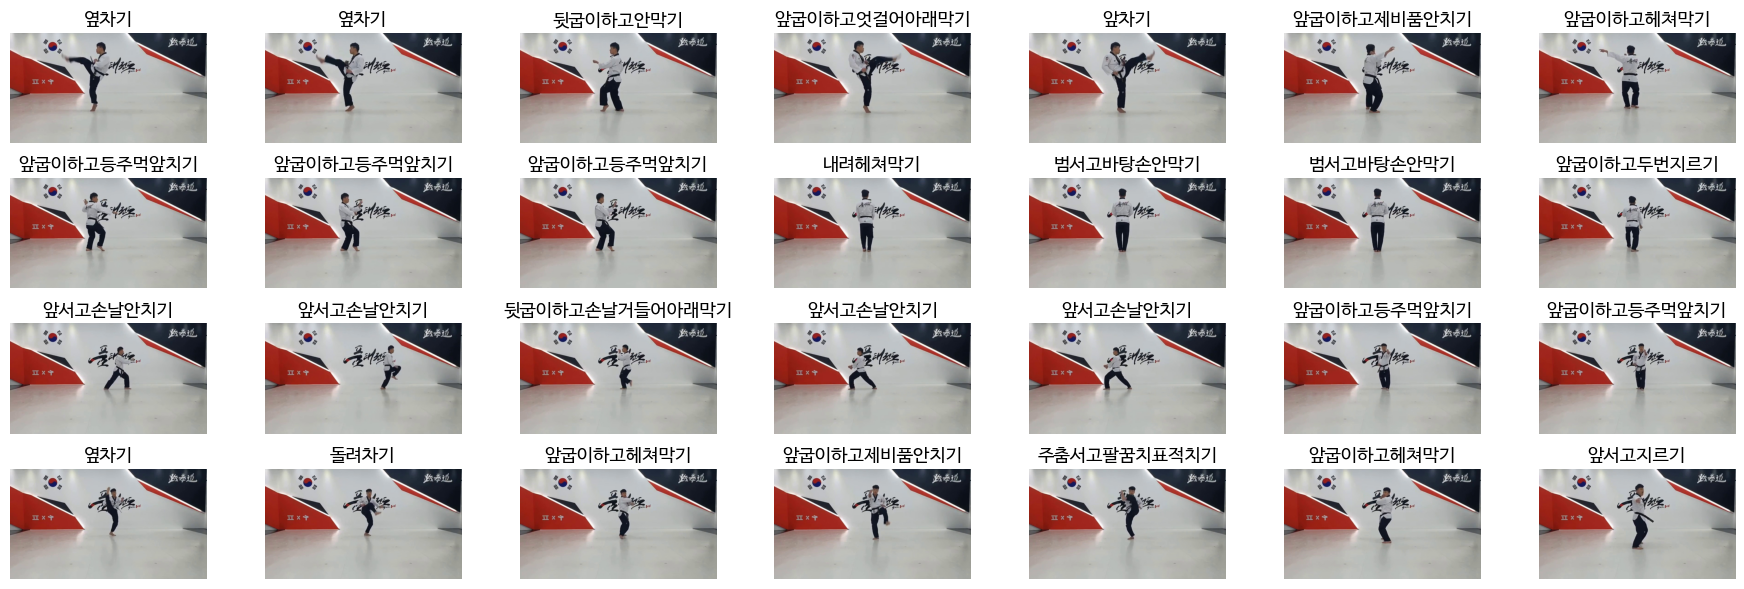

In [60]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# 그래프의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 상위 n개 시각화
img = len(result) # 동작개수
rows = 4
img2 = img//rows

index = final_df['index'][:img]

# 이미지 파일 경로와 해당 이미지의 제목 리스트
image_paths = [output_folder + f'/{os.listdir(output_folder)[i]}' for i in index]
image_titles = final_df['pose'][:img]

# 이미지와 제목을 포함한 시각화
num_images = len(image_paths)
fig, axes = plt.subplots(rows, img2, figsize=(18, 6))

for i, (image_path, title) in enumerate(zip(image_paths, image_titles)):
    row = i // img2  # 행 인덱스
    col = i % img2   # 열 인덱스

    image = Image.open(image_path)
    axes[row, col].imshow(image)
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
